In [ ]:

# title: Pathrise Assignment
# author: "Abhishek Shetty"
# date: "3/20/2021"
---

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, r2_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from scipy import stats
import category_encoders as ce
from sklearn import linear_model, model_selection


In [2]:
os.chdir('C:\\Users\\abhis\\Downloads')

In [3]:
df = pd.read_excel('Data_Pathrise.xlsx')


In [4]:
# Data Cleaning and Exploration

In [5]:
df["pathrise_status"].unique()

array(['Active', 'Closed Lost', 'Placed', 'Withdrawn (Failed)',
       'Withdrawn (Trial)', 'Withdrawn', 'Deferred', 'Break', 'MIA'],
      dtype=object)

In [6]:
df.head()

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


In [7]:
len(df)

2544

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


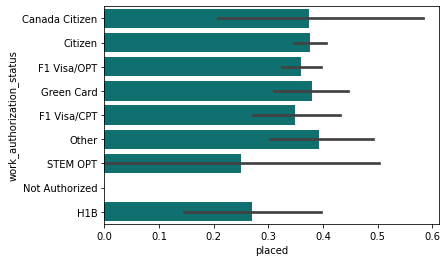

In [8]:
sns.barplot('placed', 'work_authorization_status', data=df, color="teal")

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


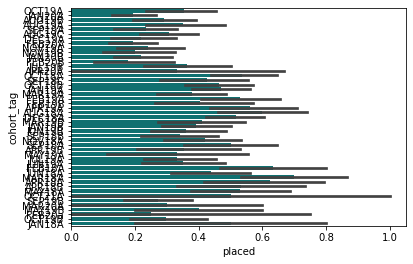

In [9]:
# we can see the effect COVID had had on the number of placements. I will ignore the Cohort column.

sns.barplot('placed', 'cohort_tag', data=df, color="teal")

In [10]:
# If we want to keep this column let's remove the last 3 characters of the cohort. Essentially, we retain only the month data.

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


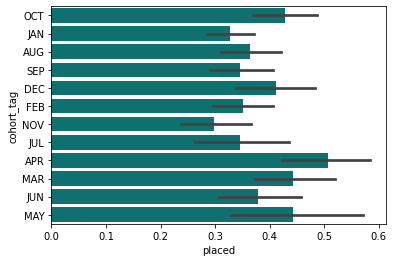

In [11]:
df['cohort_tag'] = df['cohort_tag'].str[:-3]
sns.barplot('placed', 'cohort_tag', data=df, color="teal")

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


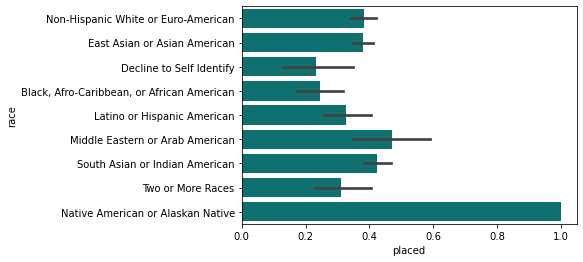

In [12]:
# This column is dropped. 

sns.barplot('placed', 'race', data=df, color="teal")

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


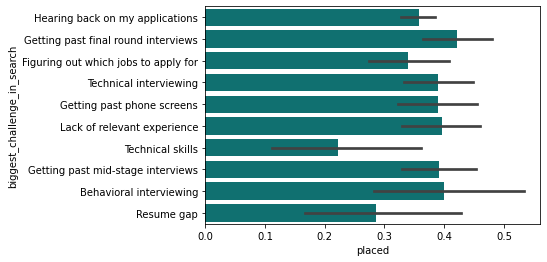

In [13]:
# This column is dropped. 

sns.barplot('placed', 'biggest_challenge_in_search', data=df, color="teal")

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


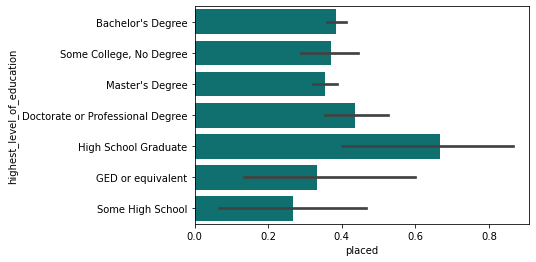

In [14]:
sns.barplot('placed', 'highest_level_of_education', data=df, color="teal")

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


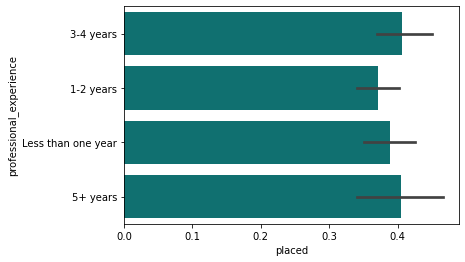

In [15]:
sns.barplot('placed', 'professional_experience', data=df, color="teal")

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


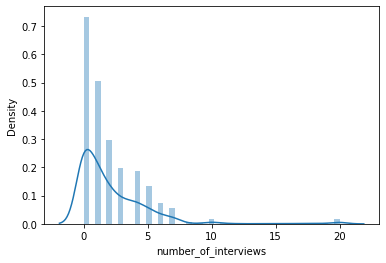

In [16]:
sns.distplot(df['number_of_interviews'])



C:\Users\abhis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


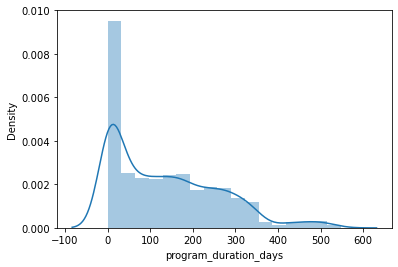

In [17]:
sns.distplot((df['program_duration_days']))


In [18]:
len(df.dropna())

988

In [19]:
df.isnull().sum()

#filling null values in columns with relevant data

id                               0
pathrise_status                  0
primary_track                    0
cohort_tag                       8
program_duration_days          616
placed                           0
employment_status              229
highest_level_of_education      58
length_of_job_search            74
biggest_challenge_in_search     24
professional_experience        222
work_authorization_status      284
number_of_interviews           218
number_of_applications           0
gender                         492
race                            18
dtype: int64

In [20]:
df['work_authorization_status'].unique()

array(['Canada Citizen', 'Citizen', 'F1 Visa/OPT', 'Green Card',
       'F1 Visa/CPT', 'Other', nan, 'STEM OPT', 'Not Authorized', 'H1B'],
      dtype=object)

In [21]:
df['program_duration_days'].median()

112.0

In [22]:
df['number_of_interviews'].mean()

2.182287188306105

In [23]:
df['length_of_job_search'].unique()

array(['3-5 months', 'Less than one month', '1-2 months',
       '6 months to a year', nan, 'Over a year'], dtype=object)

In [24]:
df['professional_experience'].unique()

array(['3-4 years', '1-2 years', 'Less than one year', '5+ years', nan],
      dtype=object)

In [25]:
df['employment_status '].unique()

array(['Unemployed', 'Employed Part-Time', 'Contractor',
       'Employed Full-Time', 'Student', nan], dtype=object)

In [26]:
df['highest_level_of_education'].unique()

array(["Bachelor's Degree", 'Some College, No Degree', "Master's Degree",
       nan, 'Doctorate or Professional Degree', 'High School Graduate',
       'GED or equivalent', 'Some High School'], dtype=object)

In [27]:
df['gender'].unique()

array(['Male', 'Female', nan, 'Decline to Self Identify', 'Non-Binary'],
      dtype=object)

In [28]:
# Replacing null values with appropriate data. 

df['work_authorization_status'] = df['work_authorization_status'].fillna('Not Authorized')

df['program_duration_days'] = df['program_duration_days'].fillna(df['program_duration_days'].median())

df['number_of_interviews'] = df['number_of_interviews'].fillna(df['number_of_interviews'].mean())

df['length_of_job_search'] = df['length_of_job_search'].fillna("None")

df['professional_experience'] = df['professional_experience'].fillna(0)

df['employment_status '] = df['employment_status '].fillna('Unemployed')

df['highest_level_of_education'] = df['highest_level_of_education'].fillna('Some College, No Degree')

df['gender'] = df['gender'].fillna('Decline to Self Identify')

In [29]:
df.isnull().sum()

id                              0
pathrise_status                 0
primary_track                   0
cohort_tag                      8
program_duration_days           0
placed                          0
employment_status               0
highest_level_of_education      0
length_of_job_search            0
biggest_challenge_in_search    24
professional_experience         0
work_authorization_status       0
number_of_interviews            0
number_of_applications          0
gender                          0
race                           18
dtype: int64

In [30]:
# creating a copy of the data before normalising.

copy = df

In [31]:
# Normalising the columns program_duration_days' , 'number_of_interviews', 'number_of_applications'

In [32]:
df['program_duration_days_normal'] = (df['program_duration_days'] - df['program_duration_days'].mean())/df['program_duration_days'].std()



In [33]:
df['number_of_interviews'] = (df['number_of_interviews'] - df['number_of_interviews'].mean())/df['number_of_interviews'].std()

In [34]:
df['number_of_applications'] = (df['number_of_applications'] - df['number_of_applications'].mean())/df['number_of_applications'].std()

In [35]:
# Feature selection on our cleaned data frame df. 

In [36]:
# our target column i.e placed is a subset of the pathrise_status column. Thus it is best if we drop pathrise_status.

# The ID column is a primary key and thus can be dropped. Biggest Challenges in Search is something I feel will be highly subjective and hence biased.


df2 = df.drop(columns = ['id','pathrise_status','biggest_challenge_in_search', 'gender',"primary_track" , 'program_duration_days'])

df2= df2.dropna()

In [37]:
df2.isnull().sum()

cohort_tag                      0
placed                          0
employment_status               0
highest_level_of_education      0
length_of_job_search            0
professional_experience         0
work_authorization_status       0
number_of_interviews            0
number_of_applications          0
race                            0
program_duration_days_normal    0
dtype: int64

In [38]:
# data = pd.get_dummies(df2, columns=[ "primary_track",'employment_status ','highest_level_of_education','professional_experience',
#       'work_authorization_status', 'gender','race', "cohort_tag"])


# I tried both ordinal and one hot encoding. I saw that the accuracy and false positive rate when we use ordinal encoding for the 
# categorical features, we get much better results.


encoder = ce.OrdinalEncoder(cols=['length_of_job_search', 'employment_status ','highest_level_of_education','professional_experience',
       'work_authorization_status', 'race', "cohort_tag"])

data = encoder.fit_transform(df2)




In [39]:
data.isnull().sum()

cohort_tag                      0
placed                          0
employment_status               0
highest_level_of_education      0
length_of_job_search            0
professional_experience         0
work_authorization_status       0
number_of_interviews            0
number_of_applications          0
race                            0
program_duration_days_normal    0
dtype: int64

In [40]:
data.head()

,cohort_tag,placed,employment_status,highest_level_of_education,length_of_job_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,race,program_duration_days_normal
0,1,0,1,1,1,1,1,-0.064422,16.093577,1,-0.165960
1,2,0,1,2,1,2,2,1.349211,-0.680288,1,-0.165960
2,3,0,2,3,2,3,2,-0.771238,-0.680288,2,-1.183712
3,3,0,3,1,2,3,2,0.995803,-0.214347,3,-1.183712
4,3,1,1,1,3,2,3,2.762844,1.183475,2,-0.374963


In [41]:
data.shape

(2518, 11)

In [42]:
# we are splitting our data into training and testing data. Placed column is our target and the other columns are our predictors.

seed = 100

X_train, X_test, y_train, y_test = train_test_split(data.drop('placed',  axis=1), data['placed'], test_size=0.2, random_state= seed)

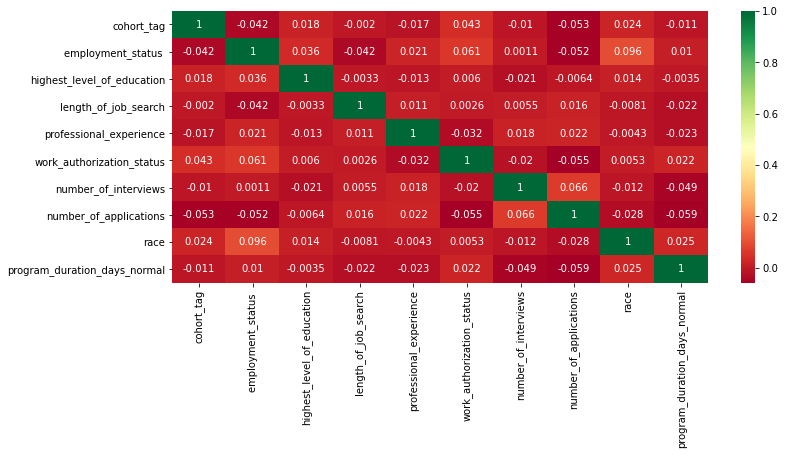

In [43]:
plt.figure(figsize=(12,5))
sns_plot = sns.heatmap(X_train.corr(), annot=True, cmap="RdYlGn")

Model accuracy score : 0.6190
Train/Test split results:
LogisticRegression accuracy is 0.619
LogisticRegression log_loss is 0.649
LogisticRegression auc is 0.653


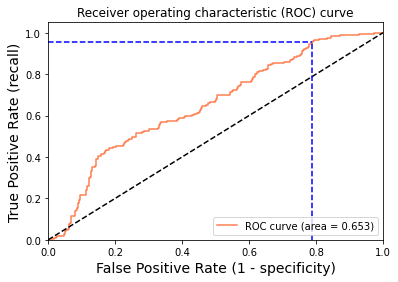

Using a threshold of 0.266 guarantees a sensitivity of 0.955 and a specificity of 0.213, i.e. a false positive rate of 78.69%.


In [44]:
# check classification scores of logistic regression

logreg = LogisticRegression()

# fit the model

logreg.fit(X_train, y_train)

# Predict on the test set results

y_pred = logreg.predict(X_test)

# Check accuracy score 

print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# check accuracy

[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

# Plotting ROC Curve

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [45]:
# confusion matrix


cm = confusion_matrix(y_test, y_pred)


accuracy = np.trace(cm) / cm.sum()

print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy)


LogisticRegression accuracy is 0.619


In [46]:
# Alogorithm 2 - Random Forest

Model accuracy score with 10 decision-trees : 0.8175
Train/Test split results:
RandomForestClassifier accuracy is 0.817
RandomForestClassifier log_loss is 0.398
RandomForestClassifier auc is 0.894


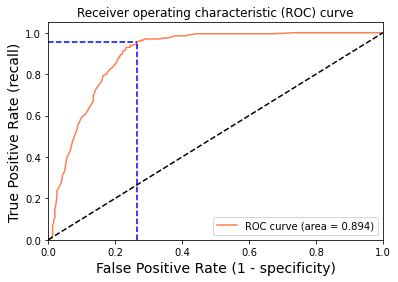

Using a threshold of 0.300 guarantees a sensitivity of 0.955 and a specificity of 0.734, i.e. a false positive rate of 26.56%.


In [47]:
# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)


# Predict the Test set results

y_pred = rfc.predict(X_test)


# Check accuracy score 

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


# ROC Curve

y_pred_proba = rfc.predict_proba(X_test)[:, 1]

# check accuracy

[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

print('Train/Test split results:')
print(rfc.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(rfc.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(rfc.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

# Plotting ROC Curve

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

Model accuracy score with 500 decision-trees : 0.8234
Train/Test split results:
RandomForestClassifier accuracy is 0.817
RandomForestClassifier log_loss is 0.398
RandomForestClassifier auc is 0.894


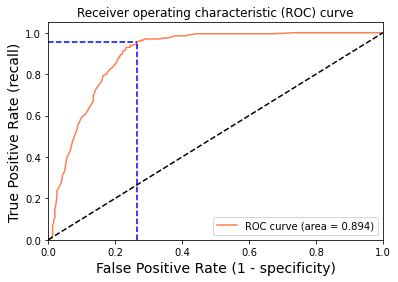

Using a threshold of 0.300 guarantees a sensitivity of 0.955 and a specificity of 0.734, i.e. a false positive rate of 26.56%.


In [48]:
# instantiate the classifier with n_estimators = 500

rfc_500 = RandomForestClassifier(n_estimators=500, random_state=0)



# fit the model to the training set

rfc_500.fit(X_train, y_train)



# Predict on the test set results:

y_pred_500 = rfc_500.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 500 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_500)))

# ROC Curve

y_pred_proba = rfc.predict_proba(X_test)[:, 1]

# check accuracy

[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

print('Train/Test split results:')
print(rfc.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(rfc.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(rfc.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

# Plotting ROC Curve

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [49]:
# create the classifier with n_estimators = 500

clf = RandomForestClassifier(n_estimators=500, random_state=0)

# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=0)

In [50]:
# view the feature scores. Checking the features and their importance for our prediction

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores


# We will remove gender and primary track and test, all our algorithms again. On doing so. We found that the false positive rate increases.

program_duration_days_normal    0.494518
number_of_applications          0.096616
cohort_tag                      0.072969
number_of_interviews            0.061768
work_authorization_status       0.051599
professional_experience         0.048768
race                            0.048281
length_of_job_search            0.047039
employment_status               0.041828
highest_level_of_education      0.036614
dtype: float64

In [51]:
# Algorithm 3 - KNN 

In [52]:
test_scores = []
train_scores = []

for i in range(1,60):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [53]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


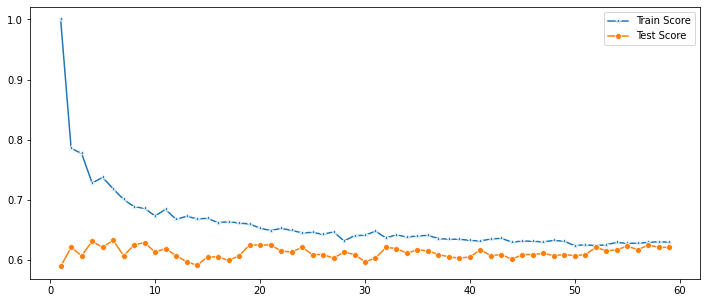

In [54]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,60),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,60),test_scores,marker='o',label='Test Score')

Model accuracy score: 0.6151
Train/Test split results:
KNeighborsClassifier accuracy is 0.615
KNeighborsClassifier log_loss is 0.398
KNeighborsClassifier auc is 0.894


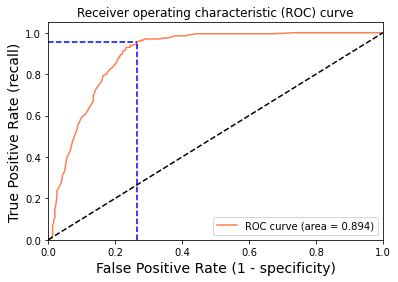

Using a threshold of 0.300 guarantees a sensitivity of 0.955 and a specificity of 0.734, i.e. a false positive rate of 26.56%.


In [55]:
# We get greatest testing accuracy for k = 53

knn = KNeighborsClassifier(n_neighbors=53)

#Fit the model
knn.fit(X_train,y_train)

# Predict the Test set results

y_pred = knn.predict(X_test)

# compute and print accuracy score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


# ROC Curve

y_pred_proba = rfc.predict_proba(X_test)[:, 1]

# check accuracy

[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

print('Train/Test split results:')
print(knn.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(knn.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(knn.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

# Plotting ROC Curve

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))


In [56]:
# Algorithm 4- SVM

Model accuracy score with default hyperparameters: 0.6111
Train/Test split results:
SVC accuracy is 0.611
SVC log_loss is 0.398
SVC auc is 0.894


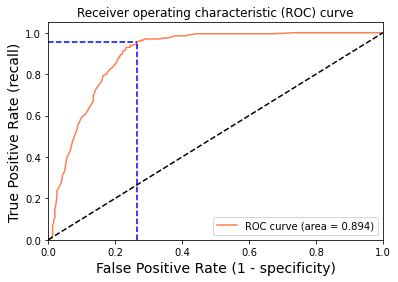

Using a threshold of 0.300 guarantees a sensitivity of 0.955 and a specificity of 0.734, i.e. a false positive rate of 26.56%.


In [57]:
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

# ROC Curve

y_pred_proba = rfc.predict_proba(X_test)[:, 1]

# check accuracy

[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

print('Train/Test split results:')
print(svc.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(svc.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(svc.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

# Plotting ROC Curve

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [58]:
# The above four algorithms will help predict if the candidate will be placed or not based on our given data.
# Random Forest had a better accuracy and lower False Positive Rate than our other models.


# Our predicted result i.e if a candidate will be placed is stored in y_pred for all the algorithms.

In [59]:
# we can predict the data of the new batch by replacing X_test and y_test with this data respectively. After preprocessing the data as shown above.

In [60]:

# Task 2

# We can assume the program duration days to be the amount of time taken for placement. We will subset our data to include only placed candidates for this prediction.



# let us denormalise our target i.e program duration days


df3 = df.drop(columns = ['id','pathrise_status', 'biggest_challenge_in_search', 'gender', "primary_track", 'program_duration_days_normal'])

df3= df3.dropna()

df3 = df3[df3['placed'] == 1 ]

encoder = ce.OrdinalEncoder(cols=['length_of_job_search','employment_status ','highest_level_of_education','professional_experience',
       'work_authorization_status','race', "cohort_tag"])

data = encoder.fit_transform(df3)

data = data.drop(columns = "placed")




In [61]:
data.shape

(948, 10)

In [62]:
data.describe()

,cohort_tag,program_duration_days,employment_status,highest_level_of_education,length_of_job_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,race
count,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000
mean,5.687764,160.837553,2.242616,1.713080,2.635021,2.565401,2.726793,-0.011472,-0.037034,3.159283
std,3.111375,100.494916,1.300718,1.028608,1.425265,1.333883,1.757842,0.978742,0.775611,2.323142
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.771238,-0.680288,1.000000
25%,3.000000,75.750000,1.000000,1.000000,1.000000,1.000000,2.000000,-0.771238,-0.531187,1.000000
50%,5.000000,145.000000,2.000000,1.000000,3.000000,3.000000,2.000000,-0.417830,-0.307536,2.000000
75%,8.000000,237.000000,3.000000,2.000000,4.000000,4.000000,4.000000,0.288986,0.158405,5.000000
max,12.000000,548.000000,5.000000,7.000000,6.000000,5.000000,9.000000,6.296927,6.774763,9.000000


In [63]:
# we are splitting our data into training and testing data. Placed column is our target and the other columns are our predictors.

seed = 100

X = data.drop('program_duration_days',axis=1)
y = data['program_duration_days']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=seed)


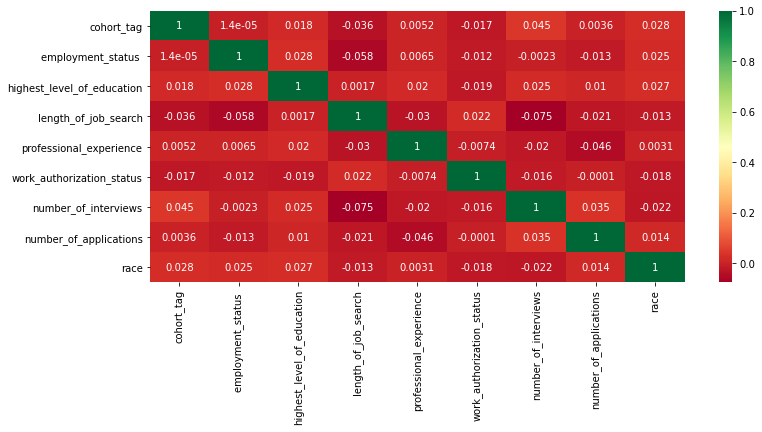

In [64]:
plt.figure(figsize=(12,5))
sns_plot = sns.heatmap(X_train.corr(), annot=True, cmap="RdYlGn")

In [65]:
y_train

362     272.0
1122     44.0
1034    239.0
673     292.0
923     342.0
        ...  
2293     37.0
2329    293.0
2240    153.0
2141    167.0
1372    219.0
Name: program_duration_days, Length: 758, dtype: float64

In [66]:
# Linear Regression

In [67]:
reg = linear_model.LinearRegression()

# X = np.array(X).reshape([-1, 1])

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)

cross_val_scores = cross_val_score(reg,  X_train,  y_train, cv=kfold)

rscore = r2_score(y_test, y_pred)

mae = mean_absolute_error( y_test, y_pred)

print("\nLinear Regression Model")
        
print("Cross Validation Scores: ", cross_val_scores)

print("Mean Squared Error: ", mse)

print("R2 Score: ", rscore)

print("Mean Absolute Error: ", mae)







Linear Regression Model
Cross Validation Scores:  [-0.10926877 -0.0178505   0.00985258  0.01228763 -0.0220507  -0.05233327
 -0.01370356 -0.05223299 -0.04008382 -0.04194844]
Mean Squared Error:  9844.62184654037
R2 Score:  0.00808523549323692
Mean Absolute Error:  83.03320900928769


In [68]:
stats.describe(y_pred)

DescribeResult(nobs=190, minmax=(116.84210721627215, 182.45085026400548), mean=161.44193052675388, variance=90.49393284418878, skewness=-0.943778032367391, kurtosis=2.963113298295707)

In [69]:
# Random Forest

In [70]:
rfr = RandomForestRegressor(n_estimators=8, max_depth=8, random_state=12, verbose=0)

rfr.fit(X_train,  y_train)
        
y_pred = rfr.predict(X_test)

mse = mean_squared_error( y_test, y_pred)

kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
        
cross_val_scores = cross_val_score(rfr, X_train,  y_train, cv=kfold)

rscore = r2_score(y_test, y_pred)

mae = mean_absolute_error( y_test, y_pred)

print("\nRandom Forest Regressor")

print("Cross Validation Scores: ", cross_val_scores)

print("Mean Squared Error: ", mse)

print("R2 Score: ", rscore)

print("Mean Absolute Error: ", mae)





Random Forest Regressor
Cross Validation Scores:  [-0.33550589 -0.16629839  0.10987697 -0.02415815 -0.04881417  0.04443776
 -0.00718633 -0.12953478 -0.14397075 -0.20341376]
Mean Squared Error:  10345.582338170787
R2 Score:  -0.04239005099604576
Mean Absolute Error:  83.5989066021224


In [71]:
# SVM

In [72]:
from sklearn.svm import SVC, SVR

svr = SVR()


svr.fit(X_train,y_train)

y_pred = svr.predict(X_test)

mse = mean_squared_error( y_test, y_pred)

kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
        
cross_val_scores = cross_val_score(svr, X_train,  y_train, cv=kfold)

rscore = r2_score(y_test, y_pred)

mae = mean_absolute_error( y_test, y_pred)

print("\nSVM")

print("Cross Validation Scores: ", cross_val_scores)

print("Mean Squared Error: ", mse)

print("R2 Score: ", rscore)

print("Mean Absolute Error: ", mae)



SVM
Cross Validation Scores:  [-0.0294327  -0.11815102 -0.02587111 -0.01392892 -0.02914478 -0.00964329
 -0.05414064 -0.00594821 -0.06139336 -0.04913627]
Mean Squared Error:  10123.419616859752
R2 Score:  -0.020005597146367515
Mean Absolute Error:  82.35066501455093


In [73]:
# From our three models for this Task, Linear Regression Provides us with the best results. 